In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
plt.style.use("ggplot")

In [7]:
data = pd.read_csv("D:\ML projects\Bike_Sharing_Project\data\hour.csv")
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [8]:
temp = pd.DataFrame(data[['casual','registered']].sum(), columns = ["count"])
temp['count']/temp['count'].sum()

casual        0.188302
registered    0.811698
Name: count, dtype: float64

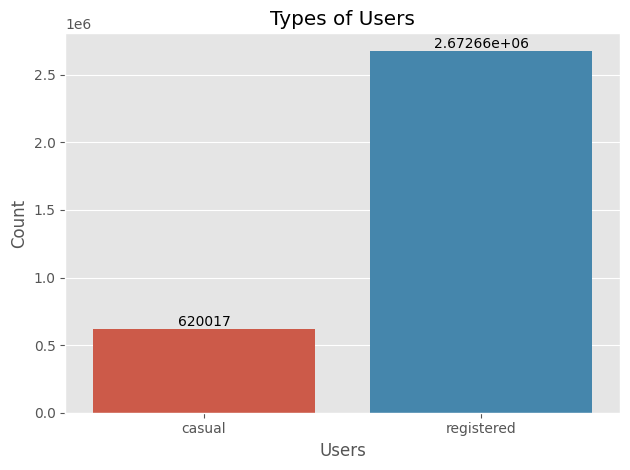

In [9]:
# data[['casual','registered']].sum().values
ax = sns.barplot(x = ['casual','registered'], y = data[['casual','registered']].sum().values)
ax.bar_label(ax.containers[0])
plt.xlabel("Users")
plt.ylabel("Count")
plt.title("Types of Users")
plt.tight_layout()


In [10]:
# Basic stats on the data
print(f"The shape of the data is: {data.shape}")
print(f"Any null values?\n{data.isna().sum()}")

The shape of the data is: (17379, 17)
Any null values?
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


### Dividing the features on different groups

In [11]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
temporal_features = ['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday','workingday']
weather_features = ['weathersit', 'temp', 'atemp', 'hum', 'windspeed']
record_features = ['casual', 'registered', 'cnt']

### Preprocessing temporal and weather features

In [13]:
# step1: create the mapping of categorical in numerical form to categorical
season_mapping = {1:'springer', 2:'summer', 3:'fall', 4:'winter'}
year_mapping = {0:2011, 1: 2012}
weekday_mapping = {0:'Sunday', 1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}
weathersit_mapping = {1:'Clear',2:'Cloudy',3:'light_rain_snow',4:'heavy_rain_snow'}

In [14]:
# create a copy of the data
preprocessed_data = data.copy()
preprocessed_data['season'] = preprocessed_data['season'].apply(lambda x: season_mapping[x])
preprocessed_data['yr'] = preprocessed_data['yr'].apply(lambda x: year_mapping[x])
preprocessed_data['weekday'] = preprocessed_data['weekday'].apply(lambda x: weekday_mapping[x])
preprocessed_data['weathersit'] = preprocessed_data['weathersit'].apply(lambda x: weathersit_mapping[x])

In [15]:
preprocessed_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,1,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,springer,2011,1,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,springer,2011,1,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,springer,2011,1,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,springer,2011,1,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,springer,2012,12,19,0,Monday,1,Cloudy,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,springer,2012,12,20,0,Monday,1,Cloudy,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,springer,2012,12,21,0,Monday,1,Clear,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,springer,2012,12,22,0,Monday,1,Clear,0.26,0.2727,0.56,0.1343,13,48,61


In [16]:
# Making the normalized tables unnormalized
preprocessed_data['hum'] = preprocessed_data['hum'] * 100
preprocessed_data['windspeed'] = preprocessed_data['windspeed'] * 67

In [17]:
preprocessed_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,1,0,0,Saturday,0,Clear,0.24,0.2879,81.0,0.0000,3,13,16
1,2,2011-01-01,springer,2011,1,1,0,Saturday,0,Clear,0.22,0.2727,80.0,0.0000,8,32,40
2,3,2011-01-01,springer,2011,1,2,0,Saturday,0,Clear,0.22,0.2727,80.0,0.0000,5,27,32
3,4,2011-01-01,springer,2011,1,3,0,Saturday,0,Clear,0.24,0.2879,75.0,0.0000,3,10,13
4,5,2011-01-01,springer,2011,1,4,0,Saturday,0,Clear,0.24,0.2879,75.0,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,springer,2012,12,19,0,Monday,1,Cloudy,0.26,0.2576,60.0,11.0014,11,108,119
17375,17376,2012-12-31,springer,2012,12,20,0,Monday,1,Cloudy,0.26,0.2576,60.0,11.0014,8,81,89
17376,17377,2012-12-31,springer,2012,12,21,0,Monday,1,Clear,0.26,0.2576,60.0,11.0014,7,83,90
17377,17378,2012-12-31,springer,2012,12,22,0,Monday,1,Clear,0.26,0.2727,56.0,8.9981,13,48,61


In [18]:
# visualize the processed data
cols = ['season','yr','weekday','weathersit','hum','windspeed']
preprocessed_data[cols].sample(10,random_state=123)

,season,yr,weekday,weathersit,hum,windspeed
5792,fall,2011,Saturday,Clear,74.0,8.9981
7823,winter,2011,Sunday,Clear,43.0,31.0009
15426,winter,2012,Tuesday,Cloudy,77.0,6.0032
15028,winter,2012,Sunday,Clear,51.0,22.0028
12290,summer,2012,Friday,Cloudy,89.0,12.9980
3262,summer,2011,Friday,Clear,64.0,7.0015
10763,summer,2012,Thursday,Clear,42.0,23.9994
12384,summer,2012,Tuesday,light_rain_snow,82.0,11.0014
6051,fall,2011,Wednesday,Clear,52.0,19.0012
948,springer,2011,Saturday,Clear,80.0,0.0000


In [19]:
data.iloc[5792]

instant             5793
dteday        2011-09-03
season                 3
yr                     0
mnth                   9
hr                    19
holiday                0
weekday                6
workingday             0
weathersit             1
temp                 0.7
atemp             0.6667
hum                 0.74
windspeed         0.1343
casual               147
registered           148
cnt                  295
Name: 5792, dtype: object

### Registered vs Casual Use Analysis

In [20]:
# verify values present in cnt column is equal to the sum of casual and registered users
assert(preprocessed_data.registered + preprocessed_data.casual == preprocessed_data.cnt).all(), 'Sum of casual and registered'\
    'rides not equal to total number of rides'

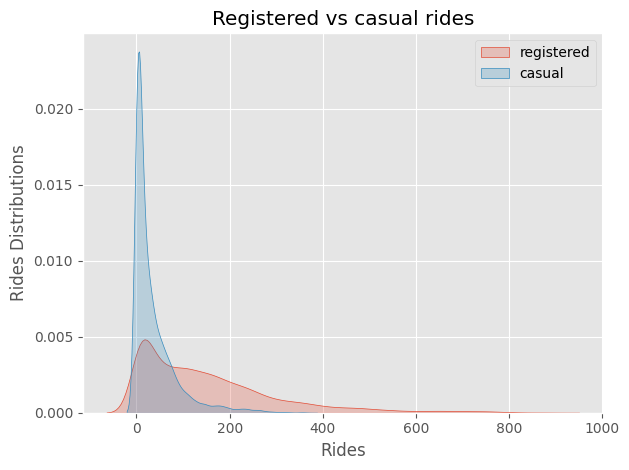

In [21]:
# Visualization of registered and casual columns
# plot distribution of registered vs casual rides
sns.kdeplot(preprocessed_data['registered'], label='registered', fill=True)
sns.kdeplot(preprocessed_data['casual'], label='casual',fill=True)
plt.legend()
plt.title("Registered vs casual rides")
plt.xlabel("Rides")
plt.ylabel("Rides Distributions")
plt.tight_layout()

### Observation:
- We can see registered users perform way more ride than the casual ones
- Two distributions are right skewed, meaning: for most of the entries in data there is entry for zero or small number of rides.
- Every entry in the data has quite a large number of rides, going higher than 800.

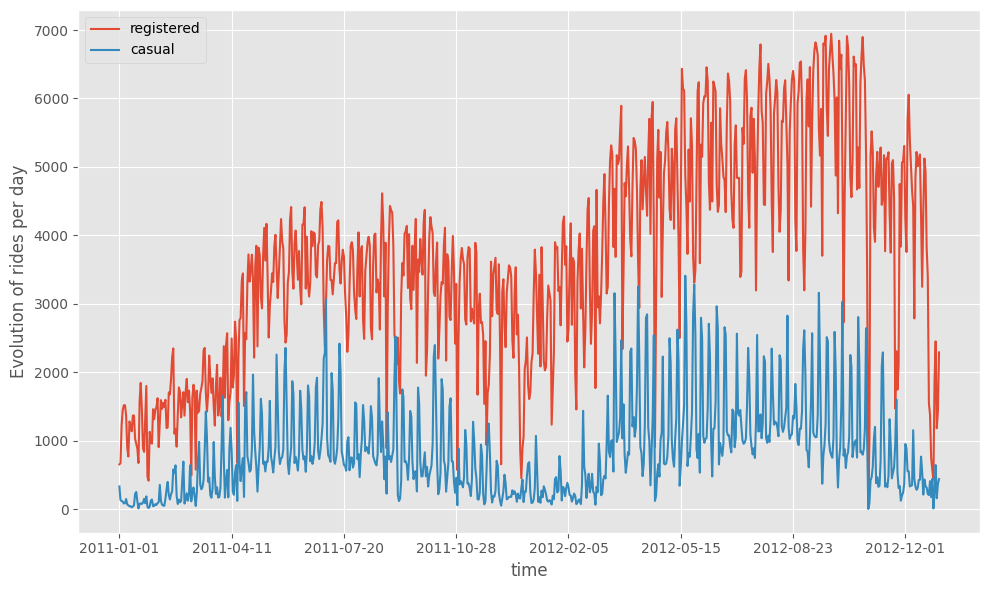

In [22]:
# Evolution of rides over time
plot_data = preprocessed_data[['registered','casual','dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize=(10,6))
ax.set_xlabel("time")
ax.set_ylabel("Evolution of rides per day")
plt.tight_layout()


### Observations:
- The rides of registered users is significantly higher than casual  users.
- In winter season the ride decreases and in summer the ride increases.
- But there is a lot of vairance in the data which we can smoothe using rolling mean and std

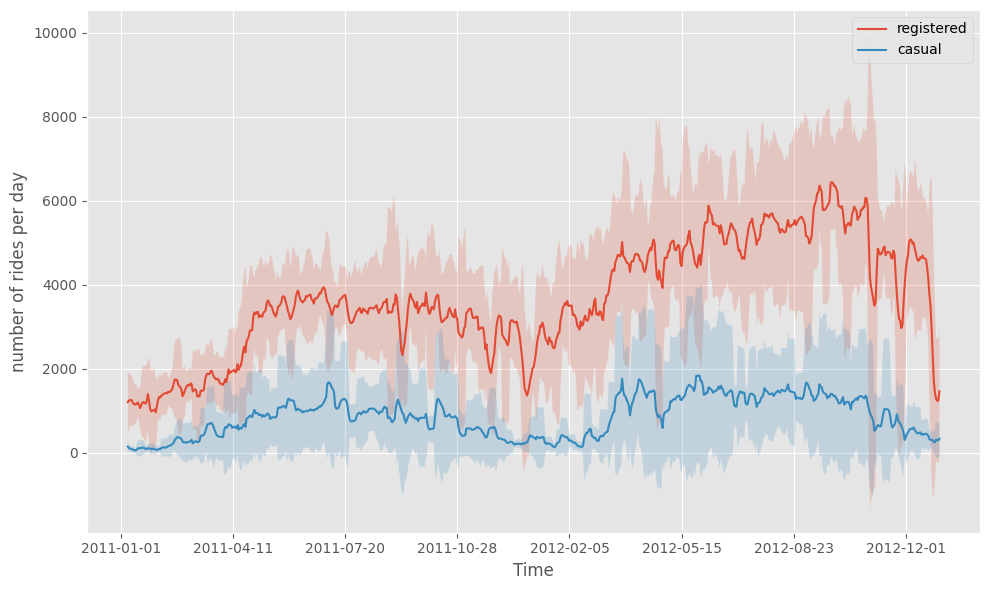

In [23]:
plot_data = preprocessed_data[['registered','casual','dteday']]
plot_data = plot_data.groupby('dteday').sum()

# define window size
window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_stds = plot_data.rolling(window).std()

# first plot the rolling means and then fill the zones with +- 2std
ax = rolling_means.plot(figsize=(10,6))
ax.fill_between(rolling_means.index, rolling_means['registered']+2*rolling_stds['registered'],rolling_means['registered']-2*rolling_stds['registered'],\
                alpha = 0.2)
ax.fill_between(rolling_means.index, rolling_means['casual']+2*rolling_stds['casual'],rolling_means['casual']-2*rolling_stds['casual'],
                alpha = 0.2)
ax.set_xlabel("Time")
ax.set_ylabel("number of rides per day")
plt.tight_layout()

### Next: Analyzing the ride requests for seeing any pattern for peak hours and peak weekdays

In [24]:
preprocessed_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

c:\Users\preet\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


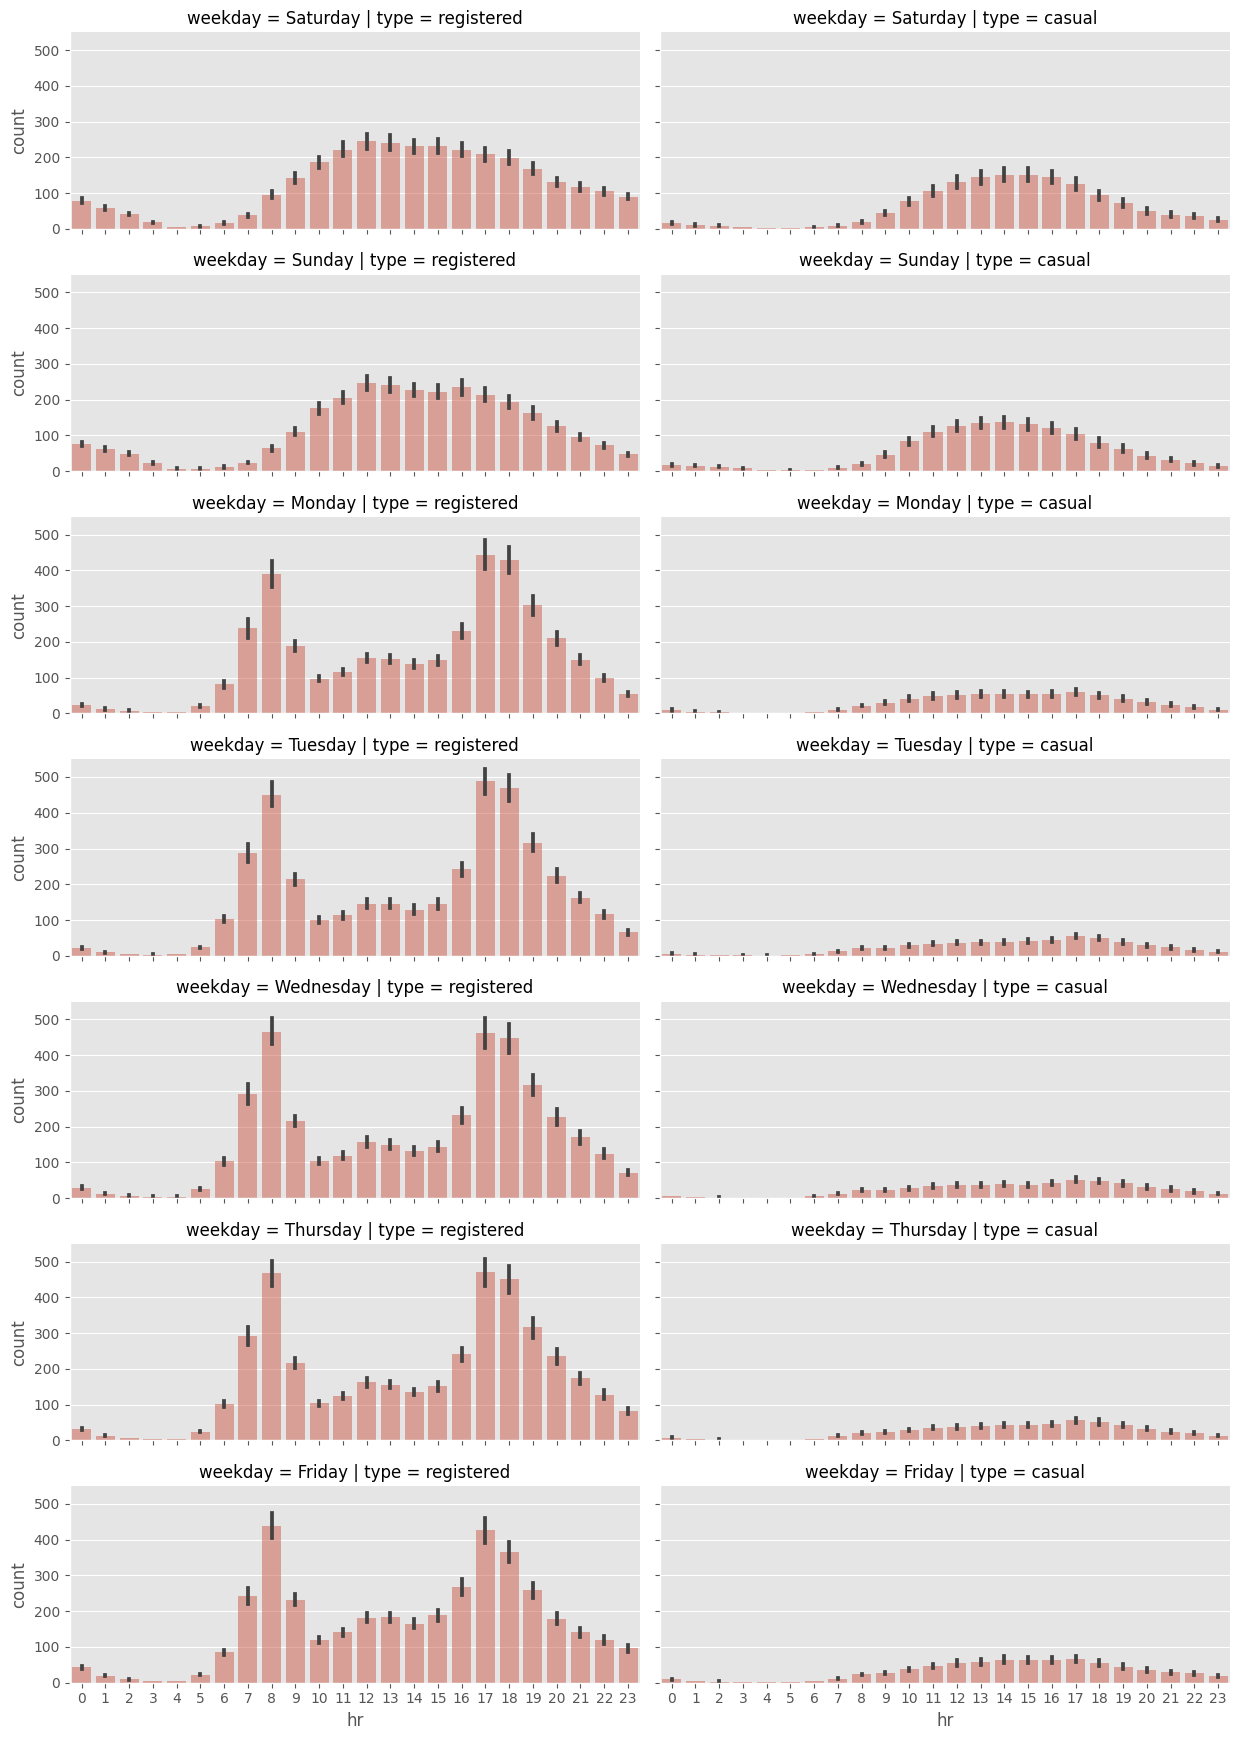

In [28]:
# select relevant columns
plot_data = preprocessed_data[['hr','weekday','registered', 'casual']]

"""
    transform the data into a format,in number of entries are computed as count, for each distinct hr, weekday and type(registered and casual)
"""
plot_data = plot_data.melt(id_vars=['hr','weekday'],var_name='type',value_name='count')

"""
Create FacetGrid object, in which a grid plot is produced. As columns we have the various days of the week, as rows, 
the diferent types(registered and casual)
"""
grid = sns.FacetGrid(plot_data, row='weekday', col='type',height=2.5,aspect=2.5,row_order=['Saturday','Sunday','Monday','Tuesday','Wednesday',
                                                                                           'Thursday','Friday'])
grid.map(sns.barplot,'hr','count',alpha = 0.5)

plt.tight_layout()


- As from we are previously seeing for the registered users the count is high than casual.
- Also for registered users there are two peak hours, one at 8 A.M and another at 6 P.M. which is nothing but working hours(9 to 5). So registered users are using the rides for commute.
- On weekends, distribution for both casual and registered users is almost similar(but count is high for registered users).
- Conclusion: most of the rides are happening on working days right before and after the working hours(9 to 5).

### Analyzing seasonal impact on rides

In [19]:
preprocessed_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

c:\Users\preet\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


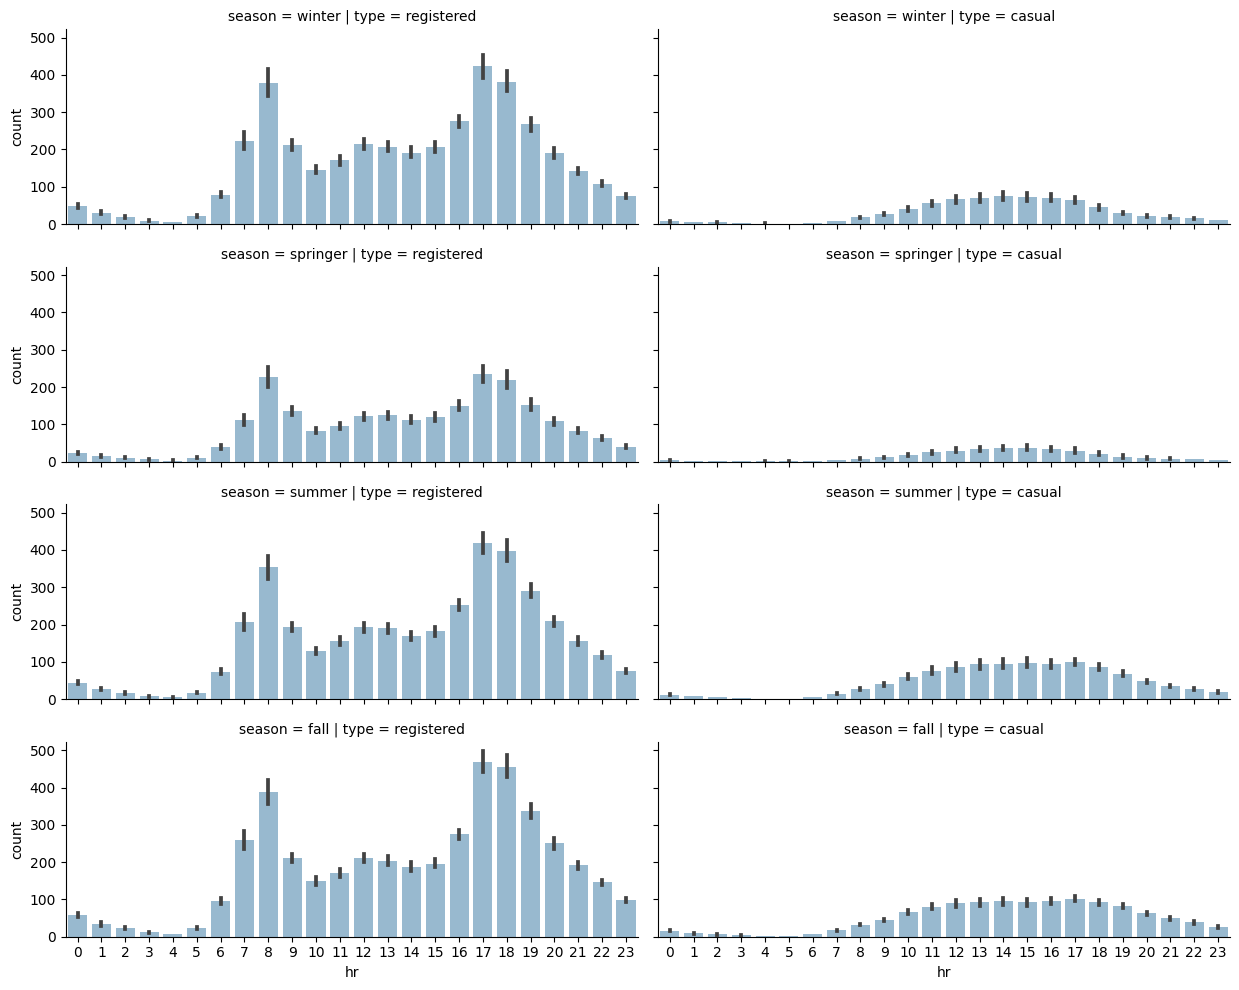

In [20]:
plot_data = preprocessed_data[['hr','season','registered','casual']]
# unpivot the data from wide to long format
plot_data = plot_data.melt(id_vars=['hr','season'],value_name='count',var_name='type')

# Define the seaborn facetgrid
grid = sns.FacetGrid(plot_data,row='season',col='type',height=2.5, row_order=['winter','springer','summer','fall'],aspect=2.5)
grid.map(sns.barplot, 'hr','count',alpha=0.5)
plt.tight_layout()


- For all season the rides are in same shape except for winter. In winter people take less rides as expected due to poor weather.

In [21]:
preprocessed_data['weekday'].value_counts()

Saturday     2512
Sunday       2502
Friday       2487
Monday       2479
Wednesday    2475
Thursday     2471
Tuesday      2453
Name: weekday, dtype: int64

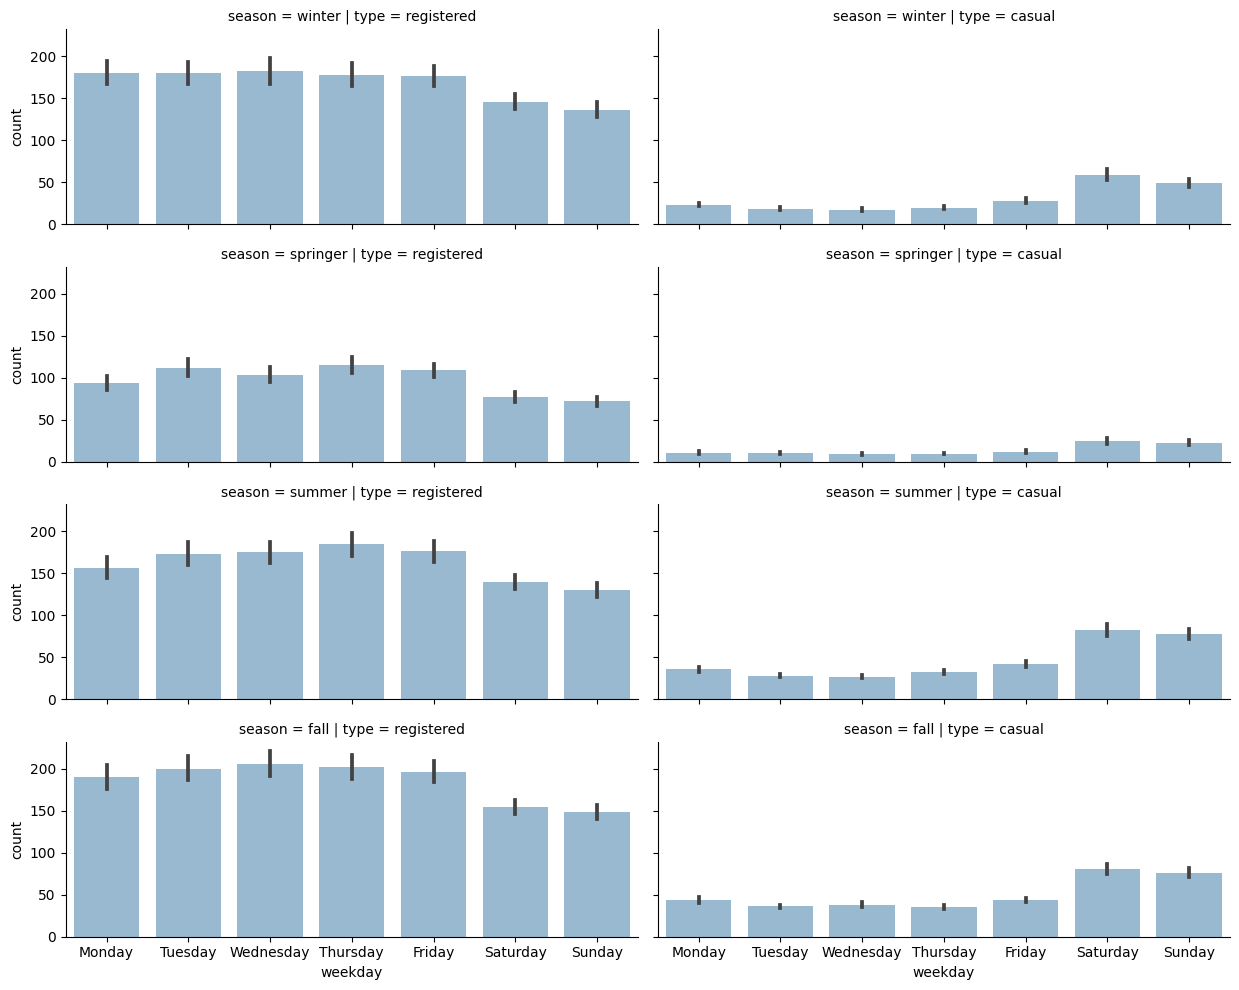

In [22]:
plot_data = preprocessed_data[['weekday','season','registered','casual']]
plot_data = plot_data.melt(id_vars=['weekday','season'],var_name='type',value_name='count')

# create facet grid object
grid = sns.FacetGrid(plot_data, row='season',col='type',row_order=['winter','springer','summer','fall'],
                     height=2.5,aspect=2.5)
grid.map(sns.barplot, 'weekday','count',alpha=0.5,order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])


- An interesting observation can be seen here is that, rides for registered users goes down on weekends and contrastingly there is a rise on casual rides on weekends which gives us more strong reason to believe that registered users uses the bike sharing service for commute purpose and casual users use ocassionally but we can't be sure with just plot observations. We can do some hypothesis test.

### Hypothesis Test
- branch of inferential statistics.
- inferential statistics is where we make a conclusion about a larger population based on measurement and test on smaller population.
- Steps to do inferential test:
- Define null and alternative hypothesis.
- Identify the appropriate test statistics.
- Calculate it! Generally we use the formula: test_statistic = (sample statistic - value under null hypothesis) / (standard error of the sample statistic)
- Identify what type of probability distribution it follows: 1) Student's t distribution 2) z-distibution 3) chi-squared distribution 4) F-distribution?

- Choosing type of distribution depends on sample size and the type of test.
- if the smample size > 30 -> we can expect that the assumptions of central limit theorem holds and that the test statistic follows the z-distribution or normal distribution.
- sample < 30, t-test should be used.

#### Significance Level
- Once the above steps are over, we need to decide on significance level.
- This value helps us to decide weather to reject or accept the null hypothesis.
- For eg. if significance level = 5%, that means that we accept that there is a 5% probability that we reject the null hypothesis being true.
- After this, we have to compute the rejection points, which are the values with which tthe test statistic is compared.
- If it is larger than the specified rejection pionts, we can reject the null hypothesis and assume that the alternative hypothesis is true.
- Two-side tests: These are the test in which the null hypothesis assumes that the value "is equal to" a predefined value.

In [23]:
# actual code in python
# First find the mean of the registred users in order to make null and alternate hypothesis.
population_mean = preprocessed_data.registered.mean()

# now just take a sample, say all rides during summer of 2011
sample = preprocessed_data[(preprocessed_data['season'] == 'summer') & (preprocessed_data['yr']==2011)].registered

# specify the significance level
alpha = 0.05 # 5%
# if the p-value obtained by the test is less than alpha, reject the null hypothesis
# perform t-test and obtain p-value
from scipy.stats import ttest_1samp
test_result = ttest_1samp(sample,population_mean)
print(f"Test statistic: {test_result[0]}, p-value: {test_result[1]}")
if test_result[1] > alpha:
    print("Null hypothesis is true and accepted")
else:
    print("Null hypothesis is rejected")

Test statistic: -13.1332546282049, p-value: 5.46843026256634e-38
Null hypothesis is rejected


- Important note here is your population_mean is computed on true population therefore the value computed by statistical test should be same. What went wrong? The answer lies in the sample. The sample taken is biased and not a true representation of population.

In [24]:
# Do same but now take the sample randomly
import random
random.seed(111)
sample = preprocessed_data.registered.sample(frac=0.05) # 5% from whole data
test_result = ttest_1samp(sample,population_mean)
print(f"Test statistics: {test_result[0]}, p-value: {test_result[1]}")
if test_result[1] > alpha:
    print("Null hypothesis is true and accepted")
else:
    print("Null hypothesis is rejected")


Test statistics: -0.23393485111641077, p-value: 0.8150907192632824
Null hypothesis is true and accepted


- Making the sample random is important otherwise it could give us the false result.

### Two-sample t-test

In [25]:
from scipy.stats import ttest_ind
# Now we want to analyze the average mean of registered users during weekdays and weekend is different as we saw in the plots.
weekend = ['Saturday','Sunday']
weekend_days = preprocessed_data[preprocessed_data.weekday.isin(weekend)].registered
working_days = preprocessed_data[~preprocessed_data.weekday.isin(weekend)].registered

# performing two-sample t-test
test_result = ttest_ind(weekend_days, working_days)
print(f"Test statistics: {test_result[0]}, p-value: {test_result[1]}")
if test_result[1] > alpha:
    print("Null hypothesis is true and accepted")
else:
    print("Null hypothesis is rejected")



Test statistics: -16.003634921919275, p-value: 3.0911815856939266e-57
Null hypothesis is rejected


- So our test also tells us that the average mean of registered users during weekend and working days is not same. That proves our observation from plots.

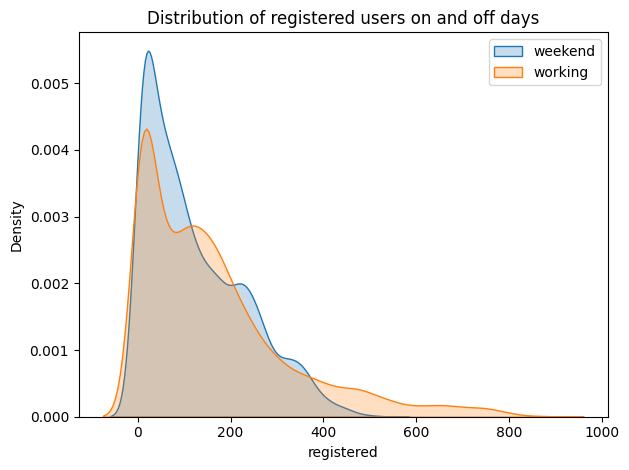

In [26]:
sns.kdeplot(weekend_days, label = "weekend", fill=True)
sns.kdeplot(working_days, label = 'working',fill=True)
plt.legend()
plt.title("Distribution of registered users on and off days")
plt.tight_layout()

In [27]:
# performing the same test on casual users
weekend = ['Sunday','Saturday']
casual_weekend_data = preprocessed_data[(preprocessed_data.workingday == 0)].casual
casual_working_data = preprocessed_data[(preprocessed_data.workingday == 1)].casual

test_result = ttest_ind(casual_weekend_data,casual_working_data)
print(f"Test statistics: {test_result[0]}, p-value: {test_result[1]}")
if test_result[1] > alpha:
    print("Null hypothesis is true and accepted")
else:
    print("Null hypothesis is rejected")

Test statistics: 41.59924056323956, p-value: 0.0
Null hypothesis is rejected


- This also proves that there is a diffrence in mean of wokring and weekend days for casual users.

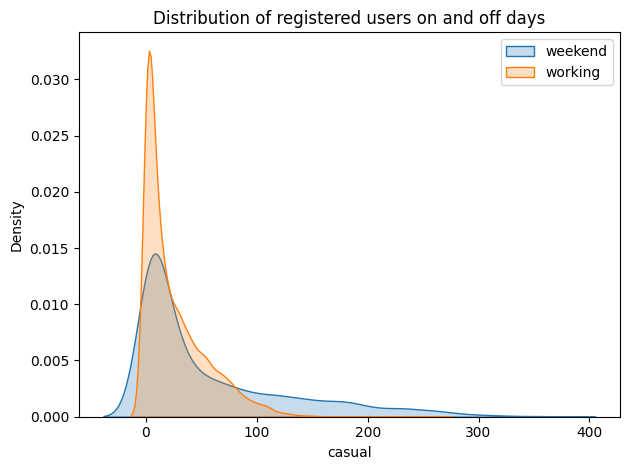

In [28]:
sns.kdeplot(casual_weekend_data, label = "weekend", fill=True)
sns.kdeplot(casual_working_data, label = 'working',fill=True)
plt.legend()
plt.title("Distribution of casual users on and off days")
plt.tight_layout()

### Analysis of weather related features

In [29]:
# weather realted features -> 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'
# except weatheresit, all are continuous values and our registered and casual features are also continuous. 
# So we can go on analyzing correaltion between features
def plot_correlations(col,data):
    # get correlation between registered and col
    corr_r = np.corrcoef(data[col], data['registered'])[0,1]
    ax = sns.regplot(data = data, x=col,y='registered',
                     scatter_kws={"alpha":0.05},
                     label=f"Registered rides (correlation: {corr_r:.3f})")
    
    # get correlation between col and casual
    corr_c = np.corrcoef(data[col],data['casual'])[0,1]
    ax = sns.regplot(data = data,x = col,y='casual',
                     scatter_kws={"alpha":0.05},
                     label=f"Casual rides (correlation: {corr_c:.3f})")
    
    # adjust legend alpha
    legend = ax.legend()
    for lh in legend.legendHandles:
        lh.set_alpha(0.5)
    ax.set_ylabel("rides")
    ax.set_title(f"Correlation between rides and {col}")
    return ax

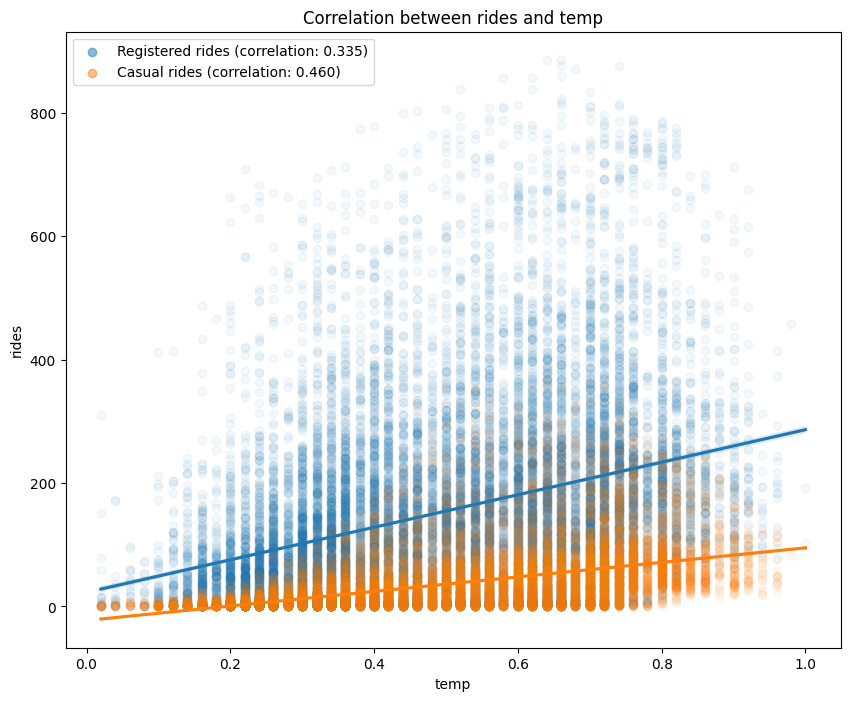

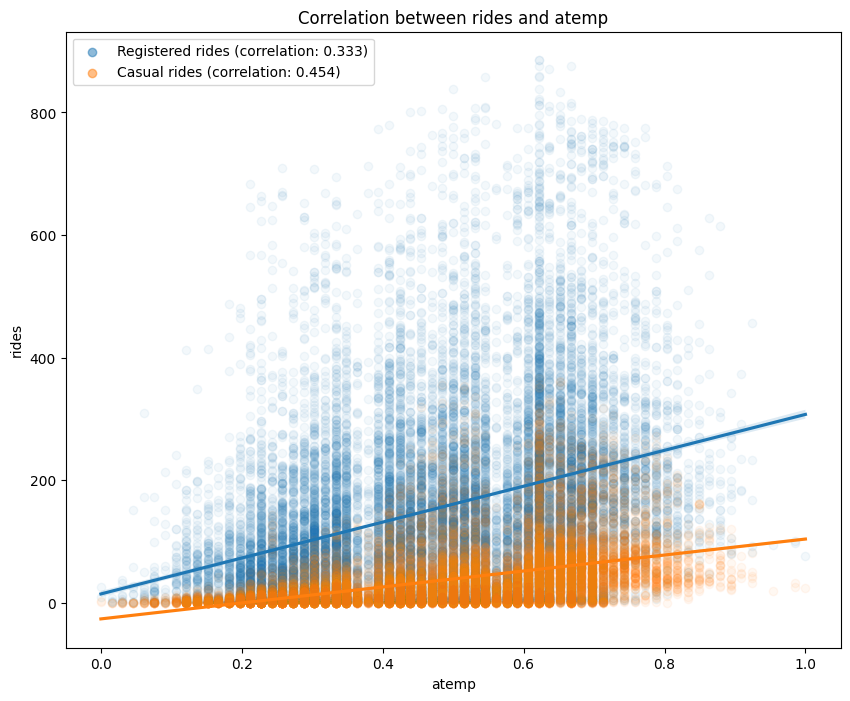

In [30]:
plt.figure(figsize=(10,8))
ax = plot_correlations("temp", preprocessed_data)
plt.figure(figsize=(10,8))
ax = plot_correlations("atemp", preprocessed_data)

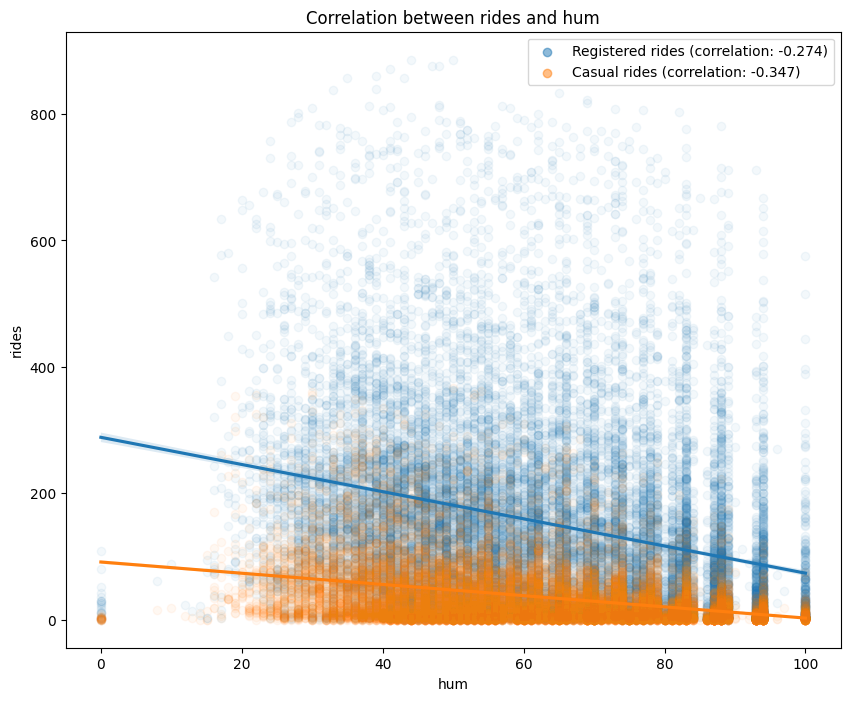

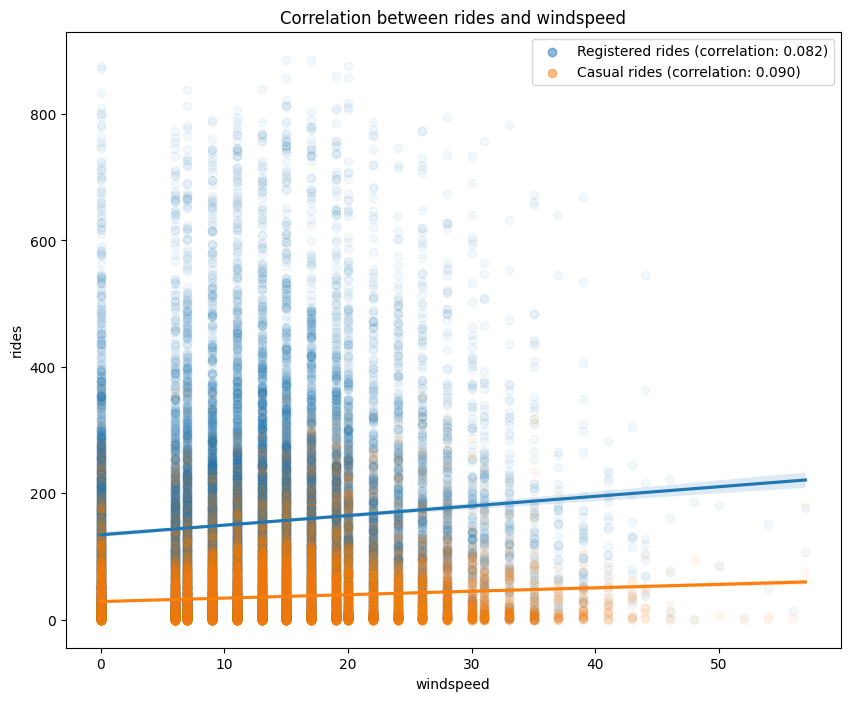

In [31]:
plt.figure(figsize=(10,8))
ax = plot_correlations('hum',preprocessed_data)

plt.figure(figsize=(10,8))
ax = plot_correlations('windspeed',preprocessed_data)

Observation:
- For temp and atemp, the correlation seems positive. As the temp goes high, bike service also goes high too. Also note the values for registered is widely spread with respect to  temp, we have lower correlation than casual. Similar pattern can be seen in humidity col with respect to negative correlation.
- But one of the drawbacks of correlation coefficient is it's strong assumption of linear relationship between two variables. And there is another correlation metric which assumes only monotonic relationship.
- Monotonic relationship is where change in one variable affect the change in another variable in specific direction. 
Types of monotonic relationship: Positive and negative.
- Spearman's relationship assumes the monotonic relationship.

In [32]:
from scipy.stats import pearsonr, spearmanr
# define function for computing correlations
def compute_correlations(data,col):
    pearsonr_reg = pearsonr(data[col],data["registered"])[0]
    spearman_reg = spearmanr(data[col], data["registered"])[0]

    pearson_cas = pearsonr(data[col],data['casual'])[0]
    spearman_cas = spearmanr(data[col],data["casual"])[0]

    return pd.Series({"Pearson (registered)": pearsonr_reg,
                      "Spearman (registered)":spearman_reg,
                      "Pearson (casual)": pearson_cas,
                      "Spearman (casual)": spearman_cas})

In [33]:
# compute the relation between different features
cols = ["temp","atemp","hum","windspeed"]
corr_data = pd.DataFrame(index=["Pearson (registered)",
                                "Spearman (registered)",
                                "Pearson (casual)",
                                "Spearman (casual)"])

In [34]:
for col in cols:
    corr_data[col] = compute_correlations(preprocessed_data,col)

corr_data.T

,Pearson (registered),Spearman (registered),Pearson (casual),Spearman (casual)
temp,0.335361,0.373196,0.459616,0.570989
atemp,0.332559,0.373014,0.454080,0.570419
hum,-0.273933,-0.338480,-0.347028,-0.388213
windspeed,0.082321,0.122936,0.090287,0.122920


Observation:
- As we can see there is specifically large difference between both coefficient w.r.t temp and atemp feature and spearman correlation is quite high telling us that there is a strong evidence for non-linearity between the features.
- An interpretation with respect to data  is that casual users are more keener to use bike sharing service while temp is high.

### Correlation matrix plot
- It allows the analyst to quickly visualize any possible relationships between the different fetures and identify potential clusters with highly correlated features.

(5.5, -0.5)

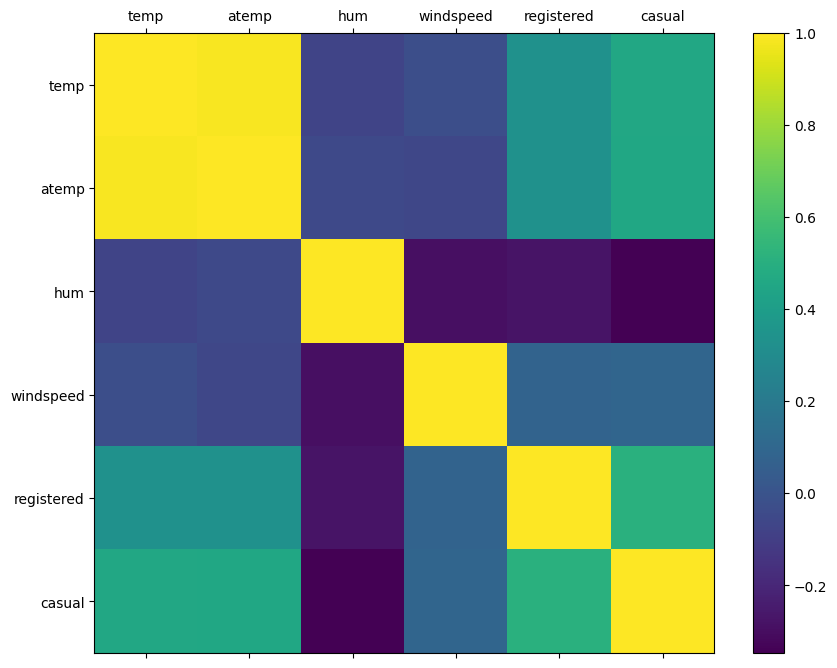

In [42]:
cols = ['temp','atemp','hum','windspeed','registered','casual']
plot_data = preprocessed_data[cols]
fig = plt.figure(figsize=(10,8))
corr = plot_data.corr()
plt.matshow(corr,fignum=fig.number)
plt.xticks(range(len(plot_data.columns)),plot_data.columns)
plt.yticks(range(len(plot_data.columns)),plot_data.columns)
plt.colorbar()
plt.ylim([5.5,-0.5])


### Time Series Analysis